In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = preprocess_input(img)
    return img


In [3]:
img_array = cv2.imread('/Users/priyanka/Desktop/train_dataset/close_eyes/female, closed (1).png', cv2.IMREAD_GRAYSCALE)

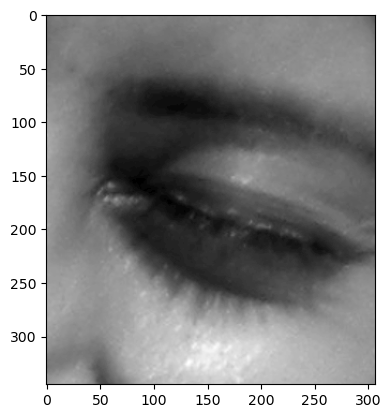

In [4]:
plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(345, 307)

Checking path: /Users/priyanka/Desktop/train_dataset/close_eyes


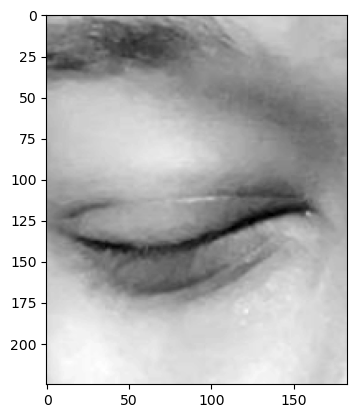

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

Datadirectory = "/Users/priyanka/Desktop/train_dataset"  
Classes = ["close_eyes", "open_eyes"]  # List of classes

for category in Classes:
    path = os.path.join(Datadirectory, category)  
    print(f"Checking path: {path}") 
    
    if not os.path.exists(path):
        print(f"Error: The directory '{path}' does not exist.")
        continue  
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        
        if not img.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {img}")
            continue

        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_array is None:
            print(f"Warning: Unable to read image {img_path}")
            continue  # Skip if image loading failed

        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

        plt.imshow(img_array, cmap="gray")
        plt.show()
        break 
    break
       

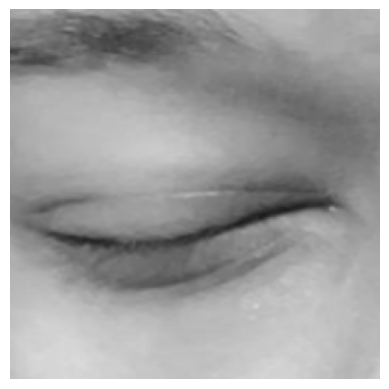

In [7]:
img_size= 224
new_array= cv2.resize(backtorgb, (img_size, img_size))
plt. imshow(new_array)
plt.axis("off") 
plt. show()

In [8]:
training_Data = []

def create_training_Data(): 
    for category in Classes:
        path = os. path. join (Datadirectory, category)
        class_num = Classes.index(category) ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [9]:
training_Data = []

def create_training_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # Assign labels (0 or 1)

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)

                
                if not img.lower().endswith(('.png', '.jpg', '.jpeg')):
                    print(f"Skipping non-image file: {img}")
                    continue  

                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img_array is None:  # Check if image is loaded correctly
                    print(f"Warning: Unable to read image {img_path}")
                    continue  

                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)  
                new_array = cv2.resize(backtorgb, (img_size, img_size))

                training_Data.append([new_array, class_num])  
            except Exception as e:
                print(f"Error processing {img}: {e}")  

create_training_Data()
print(f"Total images processed: {len(training_Data)}")


Skipping non-image file: .DS_Store
Skipping non-image file: IMG_2658 copy.MOV
Skipping non-image file: .DS_Store
Skipping non-image file: IMG_2658.MOV
Total images processed: 4186


In [10]:
print(len(training_Data))

4186


In [11]:
import random

random.shuffle(training_Data)

In [12]:
x = []
y = []

for features, label in training_Data:
    x.append(features)  # Image data
    y.append(label)  # Labels

# Convert to NumPy arrays
x = np.array(x, dtype="float32")  # Convert images to NumPy array
y = np.array(y, dtype="int")  # Convert labels to NumPy array

# Reshape `x` only if its shape is correct
if x.shape[1:] == (img_size, img_size, 3):
    x = x.reshape(-1, img_size, img_size, 3)
else:
    print("Error: Shape mismatch in image data. Check input dimensions!")

print(f"x shape: {x.shape}, y shape: {y.shape}")


x shape: (4186, 224, 224, 3), y shape: (4186,)


In [13]:
x.shape

(4186, 224, 224, 3)

In [14]:
x = np.array(x, dtype="float32") / 255.0  # Normalize between 0 and 1


In [15]:
x=x/255.0;

In [16]:
y=np.array(y)

In [17]:
import pickle

pickle_out = open ("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open ("y-pickle", "wb")
pickle.dump (y, pickle_out)
pickle_out.close()


In [18]:
pickle_in = open("X.pickle", "rb")
X = pickle. load (pickle_in)
pickle_in = open ("y-pickle", "rb" )
y = pickle.load(pickle_in)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.MobileNet()

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = True

# Freeze all layers except last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,527,681 (5.83 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,527,681 (5.83 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [23]:
base_input = model.layers[0].input

In [24]:
base_output = model.layers[-4].output

In [25]:
Flat_layer= layers.Flatten() (base_output)
final_output = layers. Dense(1) (Flat_layer) ## one node (1/ 0)
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
print(base_input)

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_91>


In [27]:
from tensorflow import keras

base_input = keras.Input(shape=(224, 224, 3))  # Example input shape for an image model


In [28]:
from tensorflow.keras import layers, Model

# Define Input Layer
base_input = keras.Input(shape=(224, 224, 3))

# Example Feature Extractor
conv_layer = layers.Conv2D(32, (3,3), activation="relu")(base_input)
flat_layer = layers.Flatten()(conv_layer)
final_output = layers.Dense(1, activation="sigmoid")(flat_layer)

# Create Model
model = Model(inputs=base_input, outputs=final_output)

# Compile the Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1577088)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │     1,577,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,577,985 (6.02 MB)

 Trainable params: 1,577,985 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print(final_output)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_257>


In [30]:
new_model = keras.Model(inputs=base_input, outputs=final_output)


In [31]:
new_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1577088)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │     1,577,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,577,985 (6.02 MB)

 Trainable params: 1,577,985 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
print(len(x), len(y))

4186 4186


In [34]:
import numpy as np

if not isinstance(x, np.ndarray):
    x = np.array(x, dtype="float32")  # Convert to NumPy array


In [35]:
y = np.array(y, dtype="int")

In [36]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
from tensorflow import keras
from tensorflow.keras import layers

# Shuffle the dataset
random.shuffle(training_Data)

# Separate features (X) and labels (y)
x = []
y = []
for features, label in training_Data:
    x.append(features)
    y.append(label)

# Convert to NumPy arrays
x = np.array(x, dtype="float32").reshape(-1, 224, 224, 3) / 255.0  # Normalize
y = np.array(y, dtype="int")

# Save using pickle
with open("x.pickle", "wb") as pickle_out:
    pickle.dump(x, pickle_out)

with open("y.pickle", "wb") as pickle_out:
    pickle.dump(y, pickle_out)

# Load the pickled data
with open("x.pickle", "rb") as pickle_in:
    x = pickle.load(pickle_in)

with open("y.pickle", "rb") as pickle_in:
    y = pickle.load(pickle_in)

# Ensure `x` and `y` are NumPy arrays before proceeding
print(f"Total Images: {len(x)}, Total Labels: {len(y)}")

# Load MobileNetV2 (better than MobileNet)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights="imagenet"
)
base_model.trainable = False  # Freeze pre-trained layers

# Custom classification layers
x = layers.Flatten()(base_model.output)  # x is now a Keras tensor
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
final_output = layers.Dense(1, activation="sigmoid")(x)

# Define the new model
new_model = keras.Model(inputs=base_model.input, outputs=final_output)

# Compile the model
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
new_model.summary()


Total Images: 4186, Total Labels: 4186


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 10,286,401 (39.24 MB)

 Trainable params: 8,028,417 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [37]:
print(type(x), type(y))  # Should output <class 'numpy.ndarray'> <class 'numpy.ndarray'>


<class 'keras.src.backend.common.keras_tensor.KerasTensor'> <class 'numpy.ndarray'>


In [38]:
print(x.shape)  # Should be (num_samples, 224, 224, 3)
print(y.shape)  # Should be (num_samples,)


(None, 128)
(4186,)


In [39]:
y = y.reshape(-1)


In [40]:
print(type(x), type(y))  


<class 'keras.src.backend.common.keras_tensor.KerasTensor'> <class 'numpy.ndarray'>


In [41]:
print(type(x))


<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [42]:
input_tensor = model.input  # avoids overwriting your data


In [43]:
x = [features for features, _ in training_Data]  
y = [label for _, label in training_Data]

x = np.array(x, dtype="float32")
y = np.array(y, dtype="int")


In [44]:
print(type(x), type(y))  # Should be <class 'numpy.ndarray'> <class 'numpy.ndarray'>
print(x.shape, y.shape)  # Should be (num_samples, 224, 224, 3) and (num_samples,)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(4186, 224, 224, 3) (4186,)


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [47]:
train_generator = datagen.flow(x_train, y_train, batch_size=32)


In [48]:
from tensorflow.keras.layers import Dropout

Flat_layer = layers.Flatten()(base_output)
dense1 = layers.Dense(128, activation='relu')(Flat_layer)
dropout = layers.Dropout(0.5)(dense1)  # Drops 50% neurons randomly
final_output = layers.Dense(1, activation='sigmoid')(dropout)


In [49]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(x_val, y_val, batch_size=32)

new_model.fit(x_train,y_train, validation_data=val_generator, epochs=10, callbacks=[early_stopping], class_weight=class_weights)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.9074 - loss: 1.5608

/Users/priyanka/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 284ms/step - accuracy: 0.9078 - loss: 1.5526 - val_accuracy: 0.7470 - val_loss: 1.9029
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 306ms/step - accuracy: 0.9973 - loss: 0.0122 - val_accuracy: 0.7661 - val_loss: 1.7641
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 345ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.6134 - val_loss: 4.8668
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.6635 - val_loss: 3.2706
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - accuracy: 0.9999 - loss: 7.5020e-04 - val_accuracy: 0.6635 - val_loss: 3.4557


In [97]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 64
DATASET_PATH = r"/Users/priyanka/Desktop/train_dataset"
CATEGORIES = ['close_eyes', 'open_eyes']

def load_images():
    data = []
    labels = []
    
    for label, category in enumerate(CATEGORIES):
        path = os.path.join(DATASET_PATH, category)
        for img_name in os.listdir(path):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(label)
    
    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    labels = to_categorical(np.array(labels), 2)
    
    return train_test_split(data, labels, test_size=0.2, random_state=42)

# Data Augmentation Generator
def get_augmented_generator(X_train, y_train):
    datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.7, 1.3],
        width_shift_range=0.1,
        height_shift_range=0.1
    )
    return datagen.flow(X_train, y_train, batch_size=32)


In [98]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_mobilenetv2_model(input_shape=(64, 64, 1)):
    # Convert grayscale to 3 channels
    input_tensor = Input(shape=input_shape)
    x = tf.keras.layers.Concatenate()([input_tensor]*3)  # Convert (64,64,1) -> (64,64,3)
    
    # Base model
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=x)
    base_model.trainable = False  # Freeze base

    # Custom head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [99]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [100]:
import tensorflow as tf


/var/folders/4m/sbv63jz12hdd574f_0zrf6k40000gn/T/ipykernel_79240/1252964962.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=x)


Epoch 1/20


/Users/priyanka/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1392']. Received: the structure of inputs=*
  warnings.warn(


104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5159 - loss: 1.6861 - val_accuracy: 0.4821 - val_loss: 0.8344
Epoch 2/20
  1/104 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5938 - loss: 0.6516

2025-04-22 20:39:43.953007: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/priyanka/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 0.6516 - val_accuracy: 0.4821 - val_loss: 0.8346
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5215 - loss: 0.8593 - val_accuracy: 0.4893 - val_loss: 0.8448
Epoch 4/20
  1/104 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5625 - loss: 0.6786

2025-04-22 20:39:48.300862: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6786 - val_accuracy: 0.4893 - val_loss: 0.8449
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5732 - loss: 0.6853 - val_accuracy: 0.4988 - val_loss: 0.8384
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7188 - loss: 0.6562 - val_accuracy: 0.4952 - val_loss: 0.8395


✅ Model saved as 'eye_state_mobilenetv2.h5'


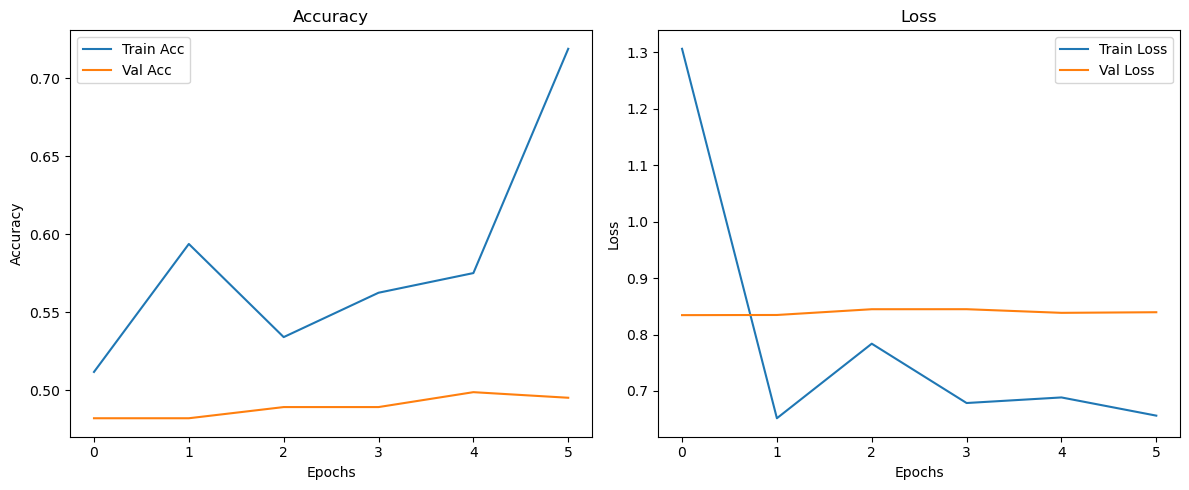

In [101]:
import matplotlib.pyplot as plt

# Load and prepare data
X_train, X_val, y_train, y_val = load_images()
train_gen = get_augmented_generator(X_train, y_train)

# Build model
model = build_mobilenetv2_model(input_shape=(64, 64, 1))

# Train
history = model.fit(
    train_gen,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[early_stop]
)

# Save model
model.save("eye_state_mobilenetv2.h5")
print("✅ Model saved as 'eye_state_mobilenetv2.h5'")

# Plotting accuracy & loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [102]:
new_model.save('my_model.h5')

In [103]:
new_model.save("my_modell_drowsiness.keras")  

In [104]:
new_model = tf.keras.models.load_model("my_modell_drowsiness.keras")

In [105]:
img_array = cv2.imread("/Users/priyanka/Downloads/IMG_2601 2.JPG", cv2.IMREAD_GRAYSCALE)

if img_array is None:
    raise ValueError("Error: Image not found or failed to load.")

backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))


In [106]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [107]:
x_input.shape

(1, 224, 224, 3)

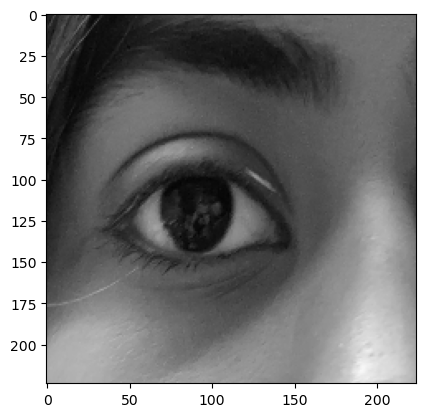

In [108]:
plt.imshow(new_array)

In [109]:
prediction = new_model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


In [110]:
prediction

array([[1.]], dtype=float32)

In [111]:
img_array = cv2.imread("/Users/priyanka/Desktop/male, closed (105).png", cv2.IMREAD_GRAYSCALE)

if img_array is None:
    raise ValueError("Error: Image not found or failed to load.")

backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))


In [112]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

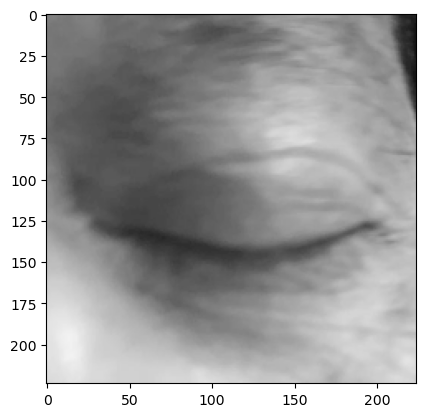

In [113]:
x_input.shape
plt.imshow(new_array)

In [114]:
prediction = new_model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [115]:
prediction

array([[2.1127135e-10]], dtype=float32)

In [116]:

img = cv2.imread("/Users/priyanka/Desktop/sad_women.jpg")

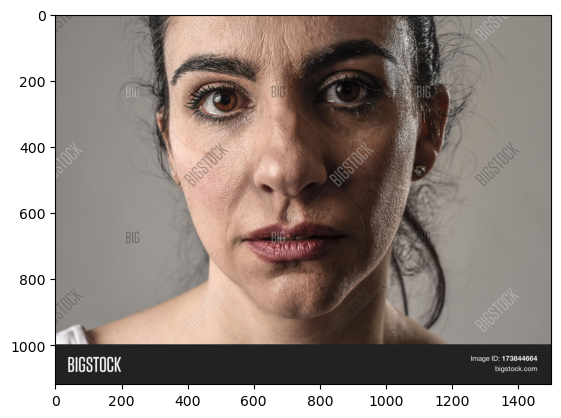

In [117]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [118]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [119]:
eye_Cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")

In [120]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [121]:
eyes = eye_Cascade.detectMultiScale(gray,1.1,4)

In [122]:
for (x, y, w, h) in eyes:
     cv2. rectangle(img, (x, y), (x+w, y+h), (8, 255, 0), 2)

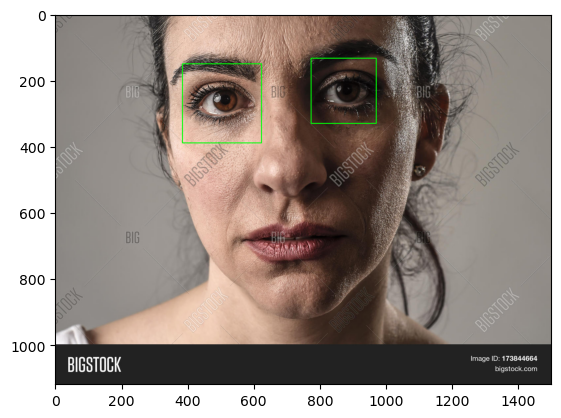

In [123]:
plt.imshow(cv2.cvtColor (img, cv2.COLOR_BGR2RGB))

In [124]:
eye_Cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#print(faceCascade.empty())

eyes = eye_Cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_Cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

eyes are not detected


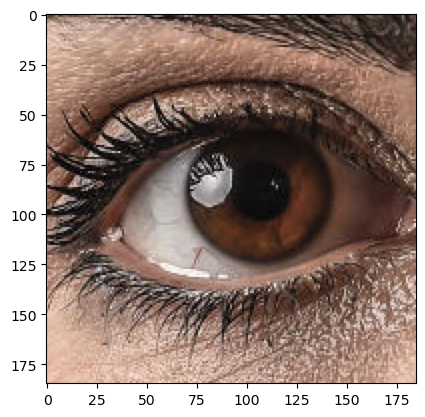

In [125]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [126]:
eyes_roi.shape

(185, 185, 3)

In [127]:
final_image =cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis =0)
final_image=final_image/255.0
## need fourth dimension

In [128]:
final_image.shape

(1, 224, 224, 3)

In [129]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


array([[1.]], dtype=float32)

In [130]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load pre-trained model
new_model = tf.keras.models.load_model("my_modell_drowsiness.keras")

# Sound alert function (cross-platform)
def play_alert():
    try:
        if os.name == "nt":  # Windows
            import winsound
            winsound.Beep(2500, 1000)
        elif os.name == "posix":  # macOS/Linux
            os.system('say "Wake up"')  # macOS
            # os.system("beep -f 2500 -l 1000")  # Linux (requires beep package)
        else:
            print("ALERT: Drowsiness detected!")  # Simple fallback
    except Exception as e:
        print("Sound alert error:", e)

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eye_Cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eye_Cascade.detectMultiScale(gray, 1.1, 4)
    eyes_roi = None

    for x, y, w, h in eyes:
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyes_roi = roi_color

    # If eyes are detected, process image
    if eyes_roi is not None:
        try:
            final_image = cv2.resize(eyes_roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)  # Add batch dimension
            final_image = final_image / 255.0

            # Predict drowsiness
            Predictions = new_model.predict(final_image)
            status = "Open Eyes" if Predictions > 0 else "Closed Eyes"

            # Play alert if eyes are closed
            if status == "Closed Eyes":
                play_alert()
        except Exception as e:
            print("Error processing eyes:", e)
            status = "Error"
    else:
        status = "No Eyes Detected"

    # Display status
    cv2.putText(frame, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Failed to grab frame


In [131]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install dlib opencv-python


Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install pygame --timeout=120


Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install opencv-python dlib imutils playsound


Note: you may need to restart the kernel to use updated packages.


In [135]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist
from playsound import playsound
import threading

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Eye aspect ratio calculation
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

# Mouth aspect ratio calculation
def mouth_aspect_ratio(mouth):
    A = dist.euclidean(mouth[2], mouth[10])  # 51, 59
    B = dist.euclidean(mouth[4], mouth[8])   # 53, 57
    C = dist.euclidean(mouth[0], mouth[6])   # 49, 55
    return (A + B) / (2.0 * C)

# Function to play alert sound in a thread
def play_alert(sound_file):
    threading.Thread(target=playsound, args=(sound_file,), daemon=True).start()

# Eye and mouth indices
LEFT_EYE_IDX = list(range(36, 42))
RIGHT_EYE_IDX = list(range(42, 48))
MOUTH_IDX = list(range(48, 60))

# Thresholds
EYE_AR_THRESH = 0.25
MOUTH_AR_THRESH = 0.75
EYE_AR_CONSEC_FRAMES = 20

# Initialize frame counters
eye_counter = 0

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (640, 480))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)

    for face in faces:
        shape = predictor(gray, face)
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])

        # Eyes
        left_eye = landmarks[LEFT_EYE_IDX]
        right_eye = landmarks[RIGHT_EYE_IDX]

        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0

        # Mouth
        mouth = landmarks[MOUTH_IDX]
        mar = mouth_aspect_ratio(mouth)

        # Draw contours
        cv2.polylines(frame, [left_eye], True, (0,255,255), 1)
        cv2.polylines(frame, [right_eye], True, (0,255,255), 1)
        cv2.polylines(frame, [mouth], True, (255,0,255), 1)

        # Check for closed eyes
        if ear < EYE_AR_THRESH:
            eye_counter += 1
            if eye_counter >= EYE_AR_CONSEC_FRAMES:
                cv2.putText(frame, "DROWSINESS ALERT!", (20, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                play_alert("/Users/priyanka/Downloads/emergency-alarm-69780.wav")
        else:
            eye_counter = 0

        # Check for yawn
        if mar > MOUTH_AR_THRESH:
            cv2.putText(frame, "YAWNING ALERT!", (20, 90),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            play_alert("/Users/priyanka/Downloads/warning-alarm-loop-1-279206.wav")

    cv2.imshow("Drowsiness and Yawn Detection", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # Press Esc to exit
        break

cap.release()
cv2.destroyAllWindows()


In [136]:
def predict_eye_state(eye_img):
    eye_img = cv2.resize(eye_img, (224, 224))  # Match MobileNetV2 input
    eye_img = cv2.cvtColor(eye_img, cv2.COLOR_GRAY2RGB)  # Convert to 3 channels
    eye_img = eye_img.astype("float32") / 255.0
    eye_img = np.expand_dims(eye_img, axis=0)  # Shape: (1, 224, 224, 3)
    pred = model.predict(eye_img)
    return int(pred[0][0] > 0.5)


In [137]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance
from keras.models import load_model
from playsound import playsound
import threading

# Load models
model = load_model('my_modell_drowsiness.keras')  # Your trained model path
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

# Alert function
def play_alert(sound_file):
    threading.Thread(target=playsound, args=(sound_file,), daemon=True).start()

# Predict eye state (0: closed, 1: open)
def predict_eye_state(eye_img):
    # Resize the eye image to match MobileNetV2 input size (224x224)
    eye_img = cv2.resize(eye_img, (224, 224))  # Match MobileNetV2 input
    
    # Convert grayscale image to 3 channels (RGB)
    eye_img = cv2.cvtColor(eye_img, cv2.COLOR_GRAY2RGB)  # Convert to 3 channels
    
    # Normalize the pixel values to range [0, 1]
    eye_img = eye_img.astype("float32") / 255.0
    
    # Expand dimensions to match the input shape (batch size, height, width, channels)
    eye_img = np.expand_dims(eye_img, axis=0)  # Shape becomes (1, 224, 224, 3)
    
    # Predict the eye state using the trained MobileNetV2 model
    pred = model.predict(eye_img)
    
    # Return 1 (open) if the probability is greater than 0.5, else 0 (closed)
    return int(pred[0][0] > 0.5)

# Mouth Aspect Ratio
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[2], mouth[10])
    B = distance.euclidean(mouth[4], mouth[8])
    C = distance.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)

# Indices
LEFT_EYE_IDX = list(range(36, 42))
RIGHT_EYE_IDX = list(range(42, 48))
MOUTH_IDX = list(range(48, 60))
MOUTH_THRESH = 0.75

# Frame count
eye_closed_frames = 0
EYE_CLOSED_LIMIT = 20

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (640, 480))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)

    for face in faces:
        shape = predictor(gray, face)
        landmarks = np.array([[p.x, p.y] for p in shape.parts()])

        # Eye ROIs
        (lStart, lEnd) = (36, 42)
        (rStart, rEnd) = (42, 48)

        left_eye_pts = landmarks[lStart:lEnd]
        right_eye_pts = landmarks[rStart:rEnd]

        def crop_eye(pts):
            x, y, w, h = cv2.boundingRect(np.array(pts))
            margin = 5
            eye_img = gray[y-margin:y+h+margin, x-margin:x+w+margin]
            return eye_img

        left_eye_img = crop_eye(left_eye_pts)
        right_eye_img = crop_eye(right_eye_pts)

        # Predict using MobileNetV2 model
        left_pred = predict_eye_state(left_eye_img)
        right_pred = predict_eye_state(right_eye_img)

        # Draw eyes
        cv2.polylines(frame, [left_eye_pts], True, (255, 255, 0), 1)
        cv2.polylines(frame, [right_eye_pts], True, (255, 255, 0), 1)

        # Closed eyes check
        if left_pred == 0 and right_pred == 0:
            eye_closed_frames += 1
            if eye_closed_frames >= EYE_CLOSED_LIMIT:
                cv2.putText(frame, "DROWSINESS ALERT!", (20, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                play_alert("/Users/priyanka/Downloads/emergency-alarm-69780.wav")
        else:
            eye_closed_frames = 0

        # Yawning detection
        mouth_pts = landmarks[MOUTH_IDX]
        mar = mouth_aspect_ratio(mouth_pts)
        if mar > MOUTH_THRESH:
            cv2.putText(frame, "YAWNING ALERT!", (20, 90),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            play_alert("/Users/priyanka/Downloads/warning-alarm-loop-1-279206.wav")

    cv2.imshow("Drowsiness and Yawn Detection", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
